# Flight KNN

### Include

In [1]:
from pathlib import *
import pandas as pd
import numpy as np

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
# Will help us visualize the results
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
def dtarr(datestring):
    
    dateparts = []
    
    dt = datetime.strptime(datestring, '%Y.%m.%d %H:%M')
    fdate = pd.to_datetime(dt).date()
    ftime = pd.to_datetime(dt).time()
    qtr = pd.to_datetime(dt).quarter
    week = pd.to_datetime(dt).week
    weekday = pd.to_datetime(dt).weekday()
    
    dateparts.append(dt)         # 0 - datetime
    dateparts.append(fdate)    # 1 - date
    dateparts.append(ftime)    # 2 - time
    dateparts.append(dt.year)    # 3 - year
    dateparts.append(qtr)        # 4 - quarter
    dateparts.append(dt.month)   # 5 - month
    dateparts.append(week)    # 6 - week
    dateparts.append(weekday) # 7 - weekday
    dateparts.append(dt.day)     # 8 - day
    dateparts.append(dt.hour)    # 9 - hour
    dateparts.append(dt.minute)  #10 - minute
    dateparts.append(dt.second)  #11 - second
    
    return dateparts

### Initialize

In [4]:
warnings.filterwarnings('ignore')

# data folder
data_folder = 'Resources'
data_file = data_folder + '/FlightsWithTimeIntervals.csv'

intervals = {'Early Morning':0,'Late Morning':1,'Early Afternoon':2,'Late Afternoon':3,'Evening':4,'Late Night':5}

In [5]:
# load raw data
DF = pd.read_csv(Path(data_file))
DF.head(3)

,flightid,flightdate,airlineid,stopid,flyfrom,flyto,flymins,scid,depart,arrive,fuelprice,price
0,212095,2022-02-11,8,1,3,1,780,1,Evening,Early Morning,2.8,913.56496
1,170840,2022-02-11,4,3,4,5,120,2,Late Afternoon,Evening,2.8,138.94496
2,165629,2022-02-11,3,3,4,1,75,2,Early Afternoon,Early Afternoon,2.8,54.84864


In [6]:
DF['arrive'] = DF['arrive'].replace(intervals)
DF['depart'] = DF['depart'].replace(intervals)
DF['flightdate'] = pd.to_datetime(DF['flightdate'])
DF['weekday'] = DF['flightdate'].dt.weekday

X = DF[['airlineid','stopid','flyfrom','flyto','flymins','scid','depart','arrive','fuelprice']]
y = DF[['price']]

Adding in the day of the week as a independent variable made our model less accurate and we have removed it from our pricing model.

In [7]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, random_state=42)

In [8]:
X.tail(3)

,airlineid,stopid,flyfrom,flyto,flymins,scid,depart,arrive,fuelprice
300256,4,1,1,3,480,2,1,3,3.835
300257,4,1,1,4,280,2,2,4,3.835
300258,1,3,1,3,165,2,5,0,3.835


### Creating the model

In [9]:
train_scores = []
test_scores = []

for k in range(1, 20, 2):
    clf = KNeighborsRegressor(n_neighbors=k)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 0.993/0.953
k: 3, Train/Test Score: 0.980/0.955
k: 5, Train/Test Score: 0.968/0.945
k: 7, Train/Test Score: 0.956/0.936
k: 9, Train/Test Score: 0.948/0.931
k: 11, Train/Test Score: 0.942/0.927
k: 13, Train/Test Score: 0.937/0.922
k: 15, Train/Test Score: 0.930/0.916
k: 17, Train/Test Score: 0.923/0.909
k: 19, Train/Test Score: 0.916/0.902


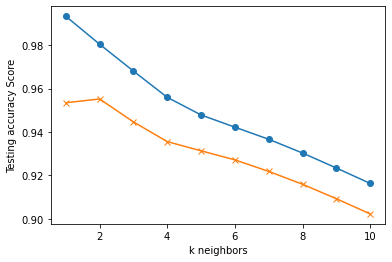

In [10]:
plt.plot(range(1, 11, 1), train_scores, marker='o')
plt.plot(range(1, 11, 1), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [11]:
#chose k = 3
clf = KNeighborsRegressor(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

### Predicting a sample

In [12]:
current_fuel_price = 3.198
x_pred = [8, 1, 2, 5, 590, 1, 0, 3, current_fuel_price]

# Use the fitted model to predict the y-value of the sample
y_pred = clf.predict([x_pred])

# Display the predicted value
y_pred

array([[676.31872]])